In [2]:
import cv2
import numpy as np

In [4]:
# Download YOLO configuration and weights
# You can download from: https://pjreddie.com/darknet/yolo/
YOLO_CONFIG = "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
YOLO_WEIGHTS = "https://pjreddie.com/media/files/yolov3.weights"
COCO_NAMES = "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

# Paths to save the downloaded files
config_path = "yolov3.cfg"
weights_path = "yolov3.weights"
names_path = "coco.names"

In [3]:
# Download files
import requests

def download_file(url, save_path):
    response = requests.get(url)
    with open(save_path, "wb") as file:
        file.write(response.content)

download_file(YOLO_CONFIG, config_path)
download_file(YOLO_WEIGHTS, weights_path)
download_file(COCO_NAMES, names_path)


In [5]:
# Load YOLO model
net = cv2.dnn.readNet(weights_path, config_path)

In [6]:
# Load COCO class names
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

# Load input image
image_path = "car.png"  
image = cv2.imread(image_path)
height, width = image.shape[:2]

In [7]:
# Preprocess image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get YOLO layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Perform detection
outputs = net.forward(output_layers)

In [8]:
# Extract bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []

conf_threshold = 0.5
nms_threshold = 0.4

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


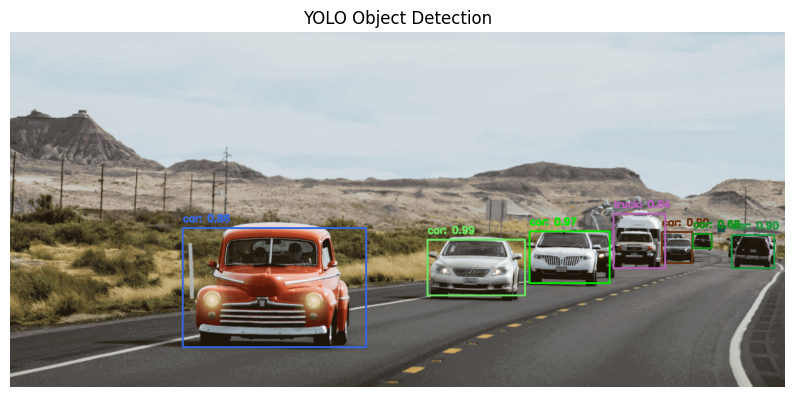

: 

In [ ]:
import matplotlib.pyplot as plt

# Apply Non-Max Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# Draw bounding boxes and class labels
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = np.random.randint(0, 255, size=(3,), dtype=int).tolist()
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save and display the result
cv2.imwrite("output.jpg", image)
# Display the output image using matplotlib
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis("off")
plt.title("YOLO Object Detection")
plt.show()